In [1]:
import pandas as pd
import seaborn as sns
import re

import sys
sys.path.append('путь_до_папки/vulnerable_populations/additional_functions')
from functions import to_modify_dataframe

##### Прочитаем данные о числе людей с инвалидностью.

In [2]:
disabled_people = pd.read_csv(filepath_or_buffer='../social_russia_data/disabled_total_by_age_2017_2022.csv', sep=',', index_col=0)
disabled_people.head()

,total,18_30,31_40,41_50,51_60,60_,date
region,,,,,,,
Российская Федерация,11640873.0,550895.0,766054.0,1030652.0,2135436.0,7157836.0,2017-01-01
Центральный федеральный округ,3420310.0,118579.0,172662.0,257484.0,598102.0,2273483.0,2017-01-01
Белгородская область,223030.0,6318.0,10383.0,16596.0,37444.0,152289.0,2017-01-01
Брянская область,110418.0,4215.0,6568.0,10230.0,21481.0,67924.0,2017-01-01
Владимирская область,133352.0,4454.0,6811.0,9606.0,23322.0,89159.0,2017-01-01


##### Обработать сразу эти данные с помощью функции to_modify_dataframe не представляется возможным, поскольку в качестве одного из признаков используется признак даты. Нам же необходимо сделать так, чтобы число людей с инвалидностью одного возраста в конкретный месяц было отражено в отдельном признаке.

##### Посмотрим за какой период здесь даны данные.

In [3]:
disabled_people['date'] = pd.to_datetime(disabled_people['date'])
print('Начало отсчёта:', disabled_people['date'].min())
print('Конец отсчёта:', disabled_people['date'].max())
print(disabled_people['date'].unique())

Начало отсчёта: 2017-01-01 00:00:00
Конец отсчёта: 2022-04-01 00:00:00
<DatetimeArray>
['2017-01-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00:00',
 '2017-04-01 00:00:00', '2017-05-01 00:00:00', '2017-06-01 00:00:00',
 '2017-07-01 00:00:00', '2017-08-01 00:00:00', '2017-09-01 00:00:00',
 '2017-10-01 00:00:00', '2017-11-01 00:00:00', '2017-12-01 00:00:00',
 '2018-01-01 00:00:00', '2018-02-01 00:00:00', '2018-03-01 00:00:00',
 '2018-04-01 00:00:00', '2018-05-01 00:00:00', '2018-06-01 00:00:00',
 '2018-07-01 00:00:00', '2018-08-01 00:00:00', '2018-09-01 00:00:00',
 '2018-10-01 00:00:00', '2018-11-01 00:00:00', '2018-12-01 00:00:00',
 '2019-01-01 00:00:00', '2019-02-01 00:00:00', '2019-03-01 00:00:00',
 '2019-04-01 00:00:00', '2019-05-01 00:00:00', '2019-06-01 00:00:00',
 '2019-07-01 00:00:00', '2019-08-01 00:00:00', '2019-09-01 00:00:00',
 '2019-10-01 00:00:00', '2019-11-01 00:00:00', '2019-12-01 00:00:00',
 '2020-01-01 00:00:00', '2020-02-01 00:00:00', '2020-03-01 00:00:00',
 '2

##### Данные предоставлены по месяцам с января 2017 года по апрель 2022 года.

In [4]:
# удалим признаки даты и общего количества людей с инвалидностью
disabled_people = disabled_people.drop(columns=['total', 'date'])

# ниже преобразуем таблицу так, чтобы её столбцами являлись число людей с инвалидностью на конкретный месяц и год
# замечу, что здесь даты будут сдвинуты на 1 день назад, но чуть позже это будет исправлено
frames = []
for region in set(disabled_people.index):
    frame = disabled_people.loc[region]
    frames.append(pd.DataFrame(
        data=frame.values.reshape(1, frame.shape[0] * frame.shape[1]),
        index=[region],
        columns=[f'{j}:{i}' for i in pd.date_range(start='2016-12-31', end='2022-04-01', freq='M').date for j in ['18_30', '31_40', '41_50', '51_60', '60_']]
        )
    )
disabled_people = pd.concat(frames)
disabled_people.head()

,18_30:2016-12-31,31_40:2016-12-31,41_50:2016-12-31,51_60:2016-12-31,60_:2016-12-31,18_30:2017-01-31,31_40:2017-01-31,41_50:2017-01-31,51_60:2017-01-31,60_:2017-01-31,...,18_30:2022-02-28,31_40:2022-02-28,41_50:2022-02-28,51_60:2022-02-28,60_:2022-02-28,18_30:2022-03-31,31_40:2022-03-31,41_50:2022-03-31,51_60:2022-03-31,60_:2022-03-31
Дальневосточный федеральный округ,22432.0,31844.0,38077.0,65612.0,204110.0,22390.0,31776.0,38057.0,65276.0,203663.0,...,27816.0,44327.0,57637.0,73852.0,264058.0,27824.0,44352.0,57802.0,73821.0,264507.0
Республика Бурятия,4946.0,7124.0,7561.0,15205.0,39260.0,4934.0,7136.0,7562.0,15151.0,39171.0,...,4244.0,6997.0,8775.0,11673.0,39937.0,4246.0,7007.0,8793.0,11627.0,40088.0
Липецкая область,4582.0,6792.0,10340.0,24905.0,78452.0,4559.0,6775.0,10296.0,24728.0,78210.0,...,3625.0,6548.0,9603.0,17247.0,69326.0,3611.0,6547.0,9605.0,17180.0,69458.0
Ханты-Мансийский автономный округ,4132.0,5368.0,5655.0,12349.0,19594.0,4119.0,5375.0,5678.0,12308.0,19637.0,...,3999.0,5916.0,7275.0,10170.0,25837.0,4024.0,5922.0,7349.0,10248.0,26027.0
Орловская область,2594.0,3727.0,5394.0,12432.0,41281.0,2595.0,3712.0,5378.0,12368.0,41147.0,...,2375.0,3506.0,5296.0,8504.0,35228.0,2381.0,3507.0,5301.0,8463.0,35220.0


##### А вот теперь можно сделать преобразования датафрейма с помощью функции to_modify_dataframe.

In [5]:
disabled_people = to_modify_dataframe(disabled_people)
disabled_people = disabled_people.rename(lambda arg:
    f"Число людей с инвалидностью в возрасте {arg.split(':')[0]} на {(pd.to_datetime(arg.split(':')[1]) + pd.Timedelta(days=1)).date()}", axis=1
    )
disabled_people.head()

Число регионов России - 85.


,Число людей с инвалидностью в возрасте 18_30 на 2017-01-01,Число людей с инвалидностью в возрасте 31_40 на 2017-01-01,Число людей с инвалидностью в возрасте 41_50 на 2017-01-01,Число людей с инвалидностью в возрасте 51_60 на 2017-01-01,Число людей с инвалидностью в возрасте 60_ на 2017-01-01,Число людей с инвалидностью в возрасте 18_30 на 2017-02-01,Число людей с инвалидностью в возрасте 31_40 на 2017-02-01,Число людей с инвалидностью в возрасте 41_50 на 2017-02-01,Число людей с инвалидностью в возрасте 51_60 на 2017-02-01,Число людей с инвалидностью в возрасте 60_ на 2017-02-01,...,Число людей с инвалидностью в возрасте 18_30 на 2022-03-01,Число людей с инвалидностью в возрасте 31_40 на 2022-03-01,Число людей с инвалидностью в возрасте 41_50 на 2022-03-01,Число людей с инвалидностью в возрасте 51_60 на 2022-03-01,Число людей с инвалидностью в возрасте 60_ на 2022-03-01,Число людей с инвалидностью в возрасте 18_30 на 2022-04-01,Число людей с инвалидностью в возрасте 31_40 на 2022-04-01,Число людей с инвалидностью в возрасте 41_50 на 2022-04-01,Число людей с инвалидностью в возрасте 51_60 на 2022-04-01,Число людей с инвалидностью в возрасте 60_ на 2022-04-01
Республика Бурятия,4946.0,7124.0,7561.0,15205.0,39260.0,4934.0,7136.0,7562.0,15151.0,39171.0,...,4244.0,6997.0,8775.0,11673.0,39937.0,4246.0,7007.0,8793.0,11627.0,40088.0
Липецкая область,4582.0,6792.0,10340.0,24905.0,78452.0,4559.0,6775.0,10296.0,24728.0,78210.0,...,3625.0,6548.0,9603.0,17247.0,69326.0,3611.0,6547.0,9605.0,17180.0,69458.0
Ханты-Мансийский автономный округ - Югра,4132.0,5368.0,5655.0,12349.0,19594.0,4119.0,5375.0,5678.0,12308.0,19637.0,...,3999.0,5916.0,7275.0,10170.0,25837.0,4024.0,5922.0,7349.0,10248.0,26027.0
Орловская область,2594.0,3727.0,5394.0,12432.0,41281.0,2595.0,3712.0,5378.0,12368.0,41147.0,...,2375.0,3506.0,5296.0,8504.0,35228.0,2381.0,3507.0,5301.0,8463.0,35220.0
Забайкальский край,5238.0,7058.0,7523.0,14362.0,48248.0,5211.0,7049.0,7543.0,14264.0,48160.0,...,4311.0,7103.0,8533.0,10708.0,42044.0,4304.0,7117.0,8563.0,10695.0,42092.0


##### Данные преобразованы в нужный вид. Но сами значения числа людей с инвалидностью не являются показательными в том смысле, что их число (скорее всего) пропорционально числу населения в регионе. Поэтому я предлагаю посмотреть на отношение числа людей с инвалидностью к общему числу населения в каждом отдельном регионе.

In [6]:
population = pd.read_csv('../datasets_mod/population_mod.csv', index_col=0)
population = population.drop(columns=['январь 2015 г.', 'январь 2016 г.'])
population.head()

,январь 2017 г.,январь 2018 г.,январь 2019 г.,январь 2020 г.,январь 2021 г.,январь 2022 г.
Белгородская область,1552865.0,1549876.0,1547418.0,1549151.0,1541259.0,1531917.0
Брянская область,1220530.0,1210982.0,1200187.0,1192491.0,1182682.0,1168771.0
Владимирская область,1389599.0,1378337.0,1365805.0,1358416.0,1342099.0,1323659.0
Воронежская область,2335408.0,2333768.0,2327821.0,2324205.0,2305608.0,2287678.0
Ивановская область,1023170.0,1014646.0,1004180.0,997135.0,987032.0,976918.0


##### Теперь из таблицы о числе людей с инвалидностью удалим те все столбцы, кроме тех, что показывают данные за январь каждого года.

In [7]:
columns_for_drop = [column for column in disabled_people.columns if not re.fullmatch('.*\d{4}-01-01\\b', column)]
disabled_people_to_population = disabled_people.drop(columns=columns_for_drop)
disabled_people_to_population.head()

,Число людей с инвалидностью в возрасте 18_30 на 2017-01-01,Число людей с инвалидностью в возрасте 31_40 на 2017-01-01,Число людей с инвалидностью в возрасте 41_50 на 2017-01-01,Число людей с инвалидностью в возрасте 51_60 на 2017-01-01,Число людей с инвалидностью в возрасте 60_ на 2017-01-01,Число людей с инвалидностью в возрасте 18_30 на 2018-01-01,Число людей с инвалидностью в возрасте 31_40 на 2018-01-01,Число людей с инвалидностью в возрасте 41_50 на 2018-01-01,Число людей с инвалидностью в возрасте 51_60 на 2018-01-01,Число людей с инвалидностью в возрасте 60_ на 2018-01-01,...,Число людей с инвалидностью в возрасте 18_30 на 2021-01-01,Число людей с инвалидностью в возрасте 31_40 на 2021-01-01,Число людей с инвалидностью в возрасте 41_50 на 2021-01-01,Число людей с инвалидностью в возрасте 51_60 на 2021-01-01,Число людей с инвалидностью в возрасте 60_ на 2021-01-01,Число людей с инвалидностью в возрасте 18_30 на 2022-01-01,Число людей с инвалидностью в возрасте 31_40 на 2022-01-01,Число людей с инвалидностью в возрасте 41_50 на 2022-01-01,Число людей с инвалидностью в возрасте 51_60 на 2022-01-01,Число людей с инвалидностью в возрасте 60_ на 2022-01-01
Республика Бурятия,4946.0,7124.0,7561.0,15205.0,39260.0,4638.0,7224.0,7680.0,14511.0,39579.0,...,4233.0,7225.0,8480.0,12588.0,41057.0,4240.0,7060.0,8734.0,11802.0,40352.0
Липецкая область,4582.0,6792.0,10340.0,24905.0,78452.0,4230.0,6769.0,10010.0,23193.0,77219.0,...,3656.0,6602.0,9674.0,18653.0,73049.0,3606.0,6550.0,9622.0,17438.0,70027.0
Ханты-Мансийский автономный округ - Югра,4132.0,5368.0,5655.0,12349.0,19594.0,4026.0,5517.0,5803.0,11894.0,20482.0,...,3901.0,5892.0,6815.0,10449.0,25457.0,4007.0,5892.0,7217.0,10181.0,25886.0
Орловская область,2594.0,3727.0,5394.0,12432.0,41281.0,2483.0,3679.0,5328.0,11619.0,40335.0,...,2304.0,3665.0,5325.0,9334.0,37607.0,2346.0,3531.0,5314.0,8649.0,35753.0
Забайкальский край,5238.0,7058.0,7523.0,14362.0,48248.0,4915.0,7095.0,7640.0,13515.0,47227.0,...,4343.0,7179.0,8281.0,11295.0,44558.0,4290.0,7143.0,8559.0,10795.0,42638.0


##### И составим новую таблицу.

In [8]:
# объединим таблицу с населением и людьми с инвалидностью по индексам
needed_columns = disabled_people_to_population.columns
disabled_people_to_population = disabled_people_to_population.merge(
    right=population,
    how='inner',
    left_index=True,
    right_index=True
)

# считаем отношение
for column in needed_columns:
    for column_population in population.columns:
        if column_population.split(' ')[1] == column.split(' ')[8][:4]:
            disabled_people_to_population[column] = round(
                disabled_people_to_population[column] / disabled_people_to_population[column_population] * 100, 6
            )
disabled_people_to_population = disabled_people_to_population[needed_columns]
disabled_people_to_population = disabled_people_to_population.rename(
    lambda arg: f"Отношение числа людей с инвалидностью в возрасте {arg.split(' ')[6]} ко всему населению в регионе на {arg.split(' ')[8][:4]} г., в %", axis=1
)
disabled_people_to_population.head()

,"Отношение числа людей с инвалидностью в возрасте 18_30 ко всему населению в регионе на 2017 г., в %","Отношение числа людей с инвалидностью в возрасте 31_40 ко всему населению в регионе на 2017 г., в %","Отношение числа людей с инвалидностью в возрасте 41_50 ко всему населению в регионе на 2017 г., в %","Отношение числа людей с инвалидностью в возрасте 51_60 ко всему населению в регионе на 2017 г., в %","Отношение числа людей с инвалидностью в возрасте 60_ ко всему населению в регионе на 2017 г., в %","Отношение числа людей с инвалидностью в возрасте 18_30 ко всему населению в регионе на 2018 г., в %","Отношение числа людей с инвалидностью в возрасте 31_40 ко всему населению в регионе на 2018 г., в %","Отношение числа людей с инвалидностью в возрасте 41_50 ко всему населению в регионе на 2018 г., в %","Отношение числа людей с инвалидностью в возрасте 51_60 ко всему населению в регионе на 2018 г., в %","Отношение числа людей с инвалидностью в возрасте 60_ ко всему населению в регионе на 2018 г., в %",...,"Отношение числа людей с инвалидностью в возрасте 18_30 ко всему населению в регионе на 2021 г., в %","Отношение числа людей с инвалидностью в возрасте 31_40 ко всему населению в регионе на 2021 г., в %","Отношение числа людей с инвалидностью в возрасте 41_50 ко всему населению в регионе на 2021 г., в %","Отношение числа людей с инвалидностью в возрасте 51_60 ко всему населению в регионе на 2021 г., в %","Отношение числа людей с инвалидностью в возрасте 60_ ко всему населению в регионе на 2021 г., в %","Отношение числа людей с инвалидностью в возрасте 18_30 ко всему населению в регионе на 2022 г., в %","Отношение числа людей с инвалидностью в возрасте 31_40 ко всему населению в регионе на 2022 г., в %","Отношение числа людей с инвалидностью в возрасте 41_50 ко всему населению в регионе на 2022 г., в %","Отношение числа людей с инвалидностью в возрасте 51_60 ко всему населению в регионе на 2022 г., в %","Отношение числа людей с инвалидностью в возрасте 60_ ко всему населению в регионе на 2022 г., в %"
Республика Бурятия,0.502574,0.723885,0.768290,1.545013,3.989294,0.471097,0.733765,0.780083,1.473930,4.020168,...,0.429558,0.733182,0.860537,1.277411,4.166400,0.431496,0.718481,0.888840,1.201064,4.106535
Липецкая область,0.396291,0.587431,0.894293,2.154000,6.785208,0.367762,0.588506,0.870283,2.016430,6.713522,...,0.324058,0.585184,0.857478,1.653353,6.474873,0.323791,0.588140,0.863982,1.565800,6.287892
Ханты-Мансийский автономный округ - Югра,0.251021,0.326108,0.343544,0.750207,1.190345,0.243252,0.333339,0.350619,0.718639,1.237528,...,0.231149,0.349124,0.403815,0.619143,1.508425,0.235396,0.346132,0.423971,0.598094,1.520702
Орловская область,0.343660,0.493763,0.714611,1.647024,5.469015,0.332286,0.492341,0.713017,1.554908,5.397814,...,0.317931,0.505736,0.734801,1.288006,5.189420,0.328528,0.494473,0.744160,1.211185,5.006764
Забайкальский край,0.485457,0.654134,0.697231,1.331068,4.471618,0.458144,0.661350,0.712151,1.259780,4.402194,...,0.412251,0.681453,0.786058,1.072156,4.229581,0.411129,0.684545,0.820246,1.034532,4.086186


##### И теперь посмотрим на корреляцию между признаками.

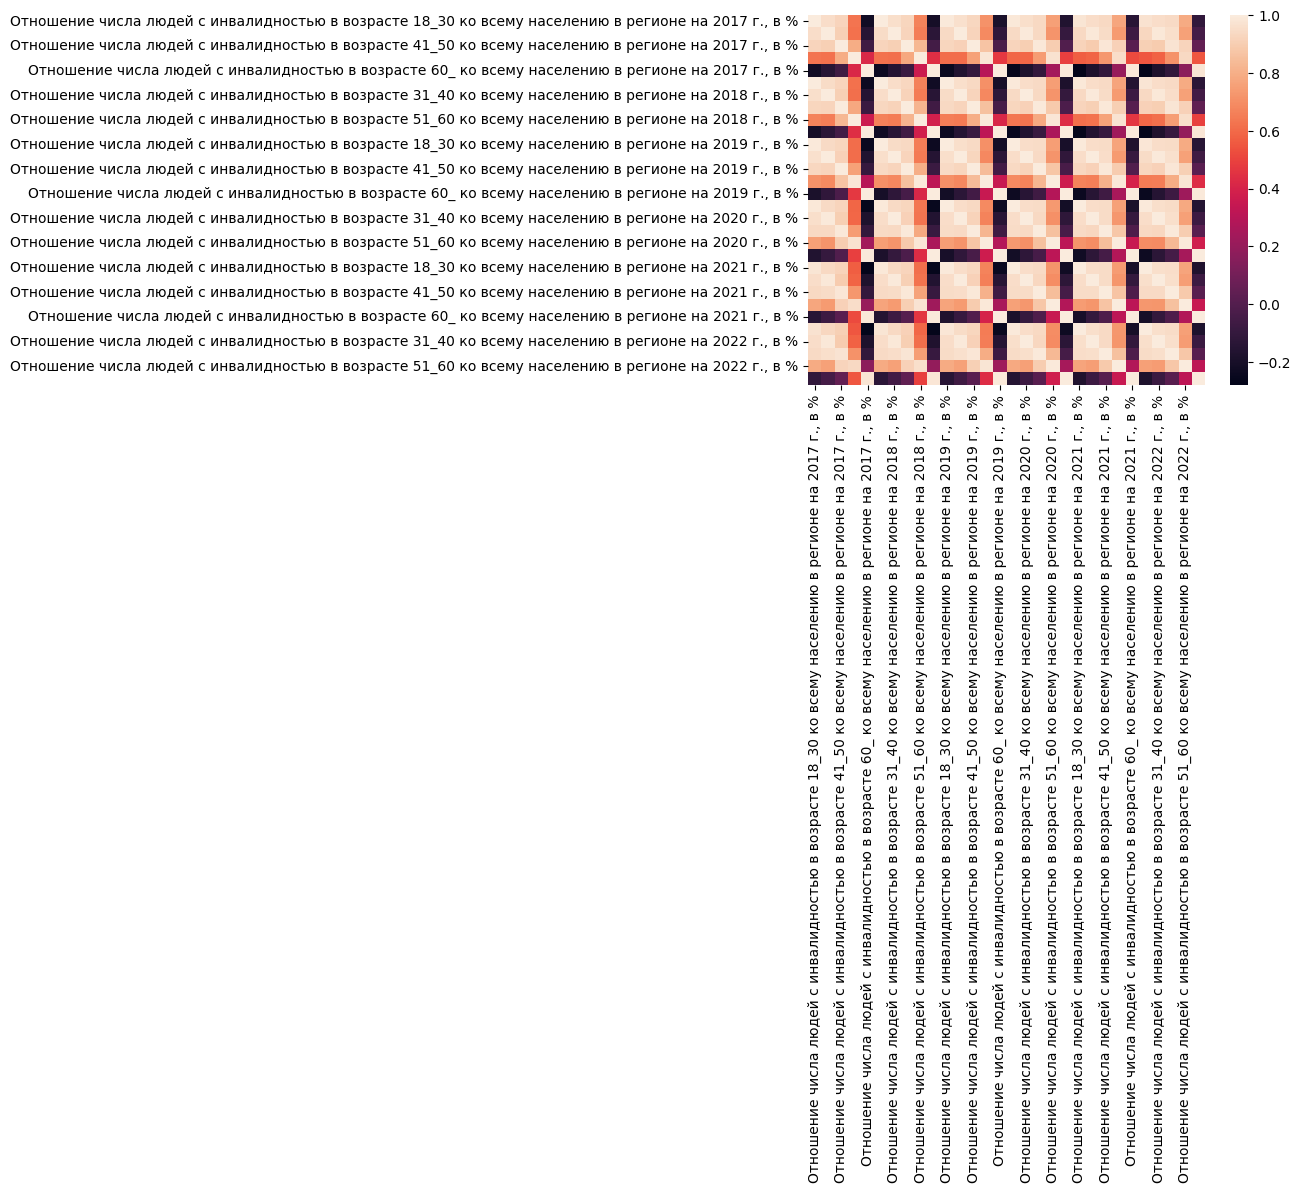

In [9]:
sns.heatmap(disabled_people_to_population.corr());

##### Очень интересно! Мы видим, что тепловая карта корреляции состоит из множества одного и того же фрагмента. В частности, в качестве одного фрагмента можно взять данные только за один год. Что мы и сделаем.

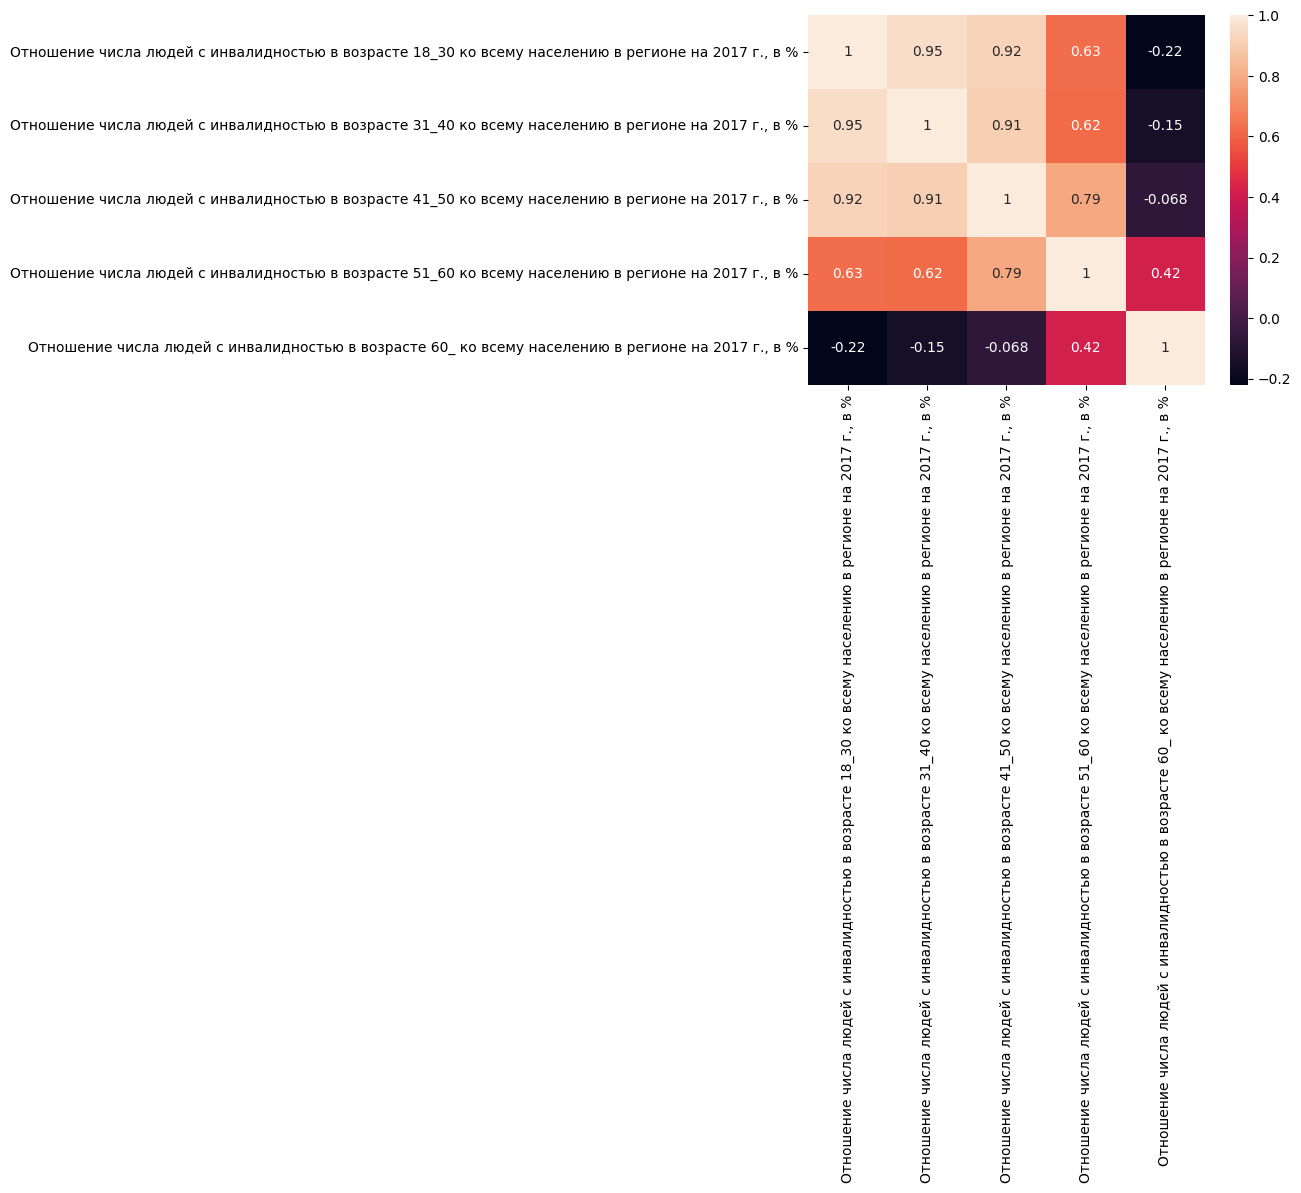

In [10]:
sns.heatmap(disabled_people_to_population[[disabled_people_to_population.columns[i] for i in range(5)]].corr(), annot=True);

##### На примере 2017 года видно, что высокая корреляция наблюдается между признаками о числе людей с инвалидностью в возрастах от 18 до 30, от 31 до 40 и от 41 до 50 лет. Поэтому я предлагаю удалить признаки с возрастами 31-40 и 41-50. И, как уже было сказано выше, поскольку корреляция между всеми признаками такая же, как и корреляция между признаками в одном году, то возьмём только 2022 год, как самый поздний из имеющихся.

In [11]:
disabled_people_to_population = disabled_people_to_population[[
    'Отношение числа людей с инвалидностью в возрасте 18_30 ко всему населению в регионе на 2022 г., в %',
    'Отношение числа людей с инвалидностью в возрасте 51_60 ко всему населению в регионе на 2022 г., в %',
    'Отношение числа людей с инвалидностью в возрасте 60_ ко всему населению в регионе на 2022 г., в %'
]]
disabled_people_to_population.head()

,"Отношение числа людей с инвалидностью в возрасте 18_30 ко всему населению в регионе на 2022 г., в %","Отношение числа людей с инвалидностью в возрасте 51_60 ко всему населению в регионе на 2022 г., в %","Отношение числа людей с инвалидностью в возрасте 60_ ко всему населению в регионе на 2022 г., в %"
Республика Бурятия,0.431496,1.201064,4.106535
Липецкая область,0.323791,1.565800,6.287892
Ханты-Мансийский автономный округ - Югра,0.235396,0.598094,1.520702
Орловская область,0.328528,1.211185,5.006764
Забайкальский край,0.411129,1.034532,4.086186


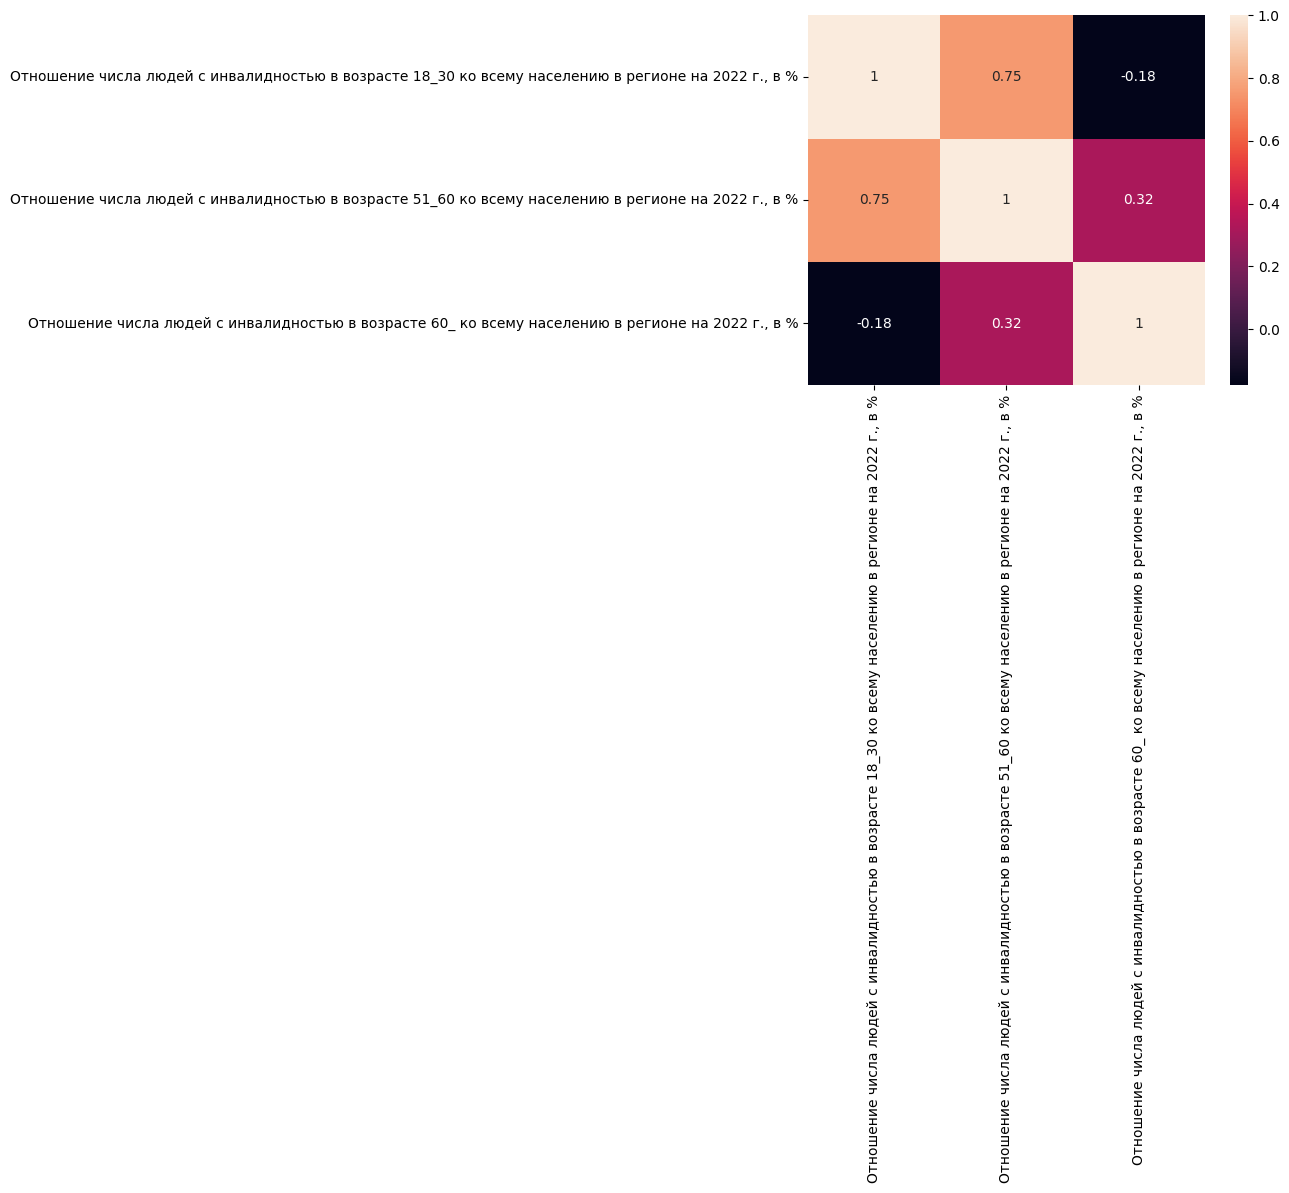

In [12]:
sns.heatmap(disabled_people_to_population.corr(), annot=True);

In [13]:
disabled_people_to_population.to_csv('../datasets_mod/disabled_people.csv', sep=',')